* Name: **Vu Truong Si**
* Github: **vutruong99**
* USC ID: **6031936649**

In [61]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

In [62]:
train = pd.read_csv("../data/aps_failure_training_set.csv", skiprows = 19)
test = pd.read_csv("../data/aps_failure_test_set.csv", skiprows = 19)

In [63]:
dataset = pd.concat([train,test], axis = 0)
dataset

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


**1. Tree Based Methods**

**(b) Data Preparation**

**i. Research what types of techniques are usually used for dealing with data with missing values. Pick at least one of them and apply it to this data in the next steps.**

There are different techniques to deal with missing values. For example: 
* Impute the data using mean, mode or median
* Remove the columns / rows with missing data 
* Impute the data using regression (predict the missing values)

In this homework I will use mean imputation.

In [64]:
# Replace na values in np.nan.

train = train.replace('na', np.nan)
test = test.replace("na", np.nan)
dataset = dataset.replace("na", np.nan)

In [65]:
# Encode the classes: Neg = 0, Pos = 1.

train['class'] = train['class'].map({'neg': 0, 'pos': 1})
test['class'] = test['class'].map({'neg': 0, 'pos': 1})
dataset['class'] = dataset['class'].map({'neg': 0, 'pos': 1})

In [66]:
columns = train.columns
columns_for_cv = train.iloc[:,1:].columns

In [67]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy = 'mean')

In [68]:
# Mean imputation.

train = pd.DataFrame(imp_mean.fit_transform(train), columns = columns)
test = pd.DataFrame(imp_mean.fit_transform(test), columns = columns)
dataset = pd.DataFrame(imp_mean.fit_transform(dataset), columns = columns)

**ii. For each of the 170 features, calculate the coeficient of variation CV = s/m, where s is sample standard deviation and m is sample mean.**

In [121]:
cv_dict = dict()

for column in dataset[columns_for_cv]:
    try:
        sample_mean = dataset[column].mean()
        sample_std = dataset[column].std()
        cv = sample_std / sample_mean
        cv_dict[column] = cv
    except:
        continue

In [122]:
cv_dict

{'aa_000': 4.328607835435785,
 'ab_000': 2.178272593944041,
 'ac_000': 2.1676533085378886,
 'ad_000': 206.72149958176453,
 'ae_000': 22.293670429503308,
 'af_000': 18.209015502890768,
 'ag_000': 91.46065359583645,
 'ag_001': 42.08434252956986,
 'ag_002': 17.625908567425444,
 'ag_003': 8.753299520356666,
 'ag_004': 5.475116255434917,
 'ag_005': 2.9642299310403146,
 'ag_006': 2.3525878821684465,
 'ag_007': 2.8124979751566856,
 'ag_008': 6.274980079892739,
 'ag_009': 32.16705734053676,
 'ah_000': 2.3155400947419187,
 'ai_000': 18.506308128781928,
 'aj_000': 43.14447956358556,
 'ak_000': 78.62298773590766,
 'al_000': 9.11199122164582,
 'am_0': 9.067195453929418,
 'an_000': 2.2542266522583447,
 'ao_000': 2.2761144767667703,
 'ap_000': 3.0858848873966314,
 'aq_000': 2.853471317417596,
 'ar_000': 10.569202321811572,
 'as_000': 113.88275538316807,
 'at_000': 23.18705992823811,
 'au_000': 86.0856375114368,
 'av_000': 5.7304853575294405,
 'ax_000': 3.8590349934226182,
 'ay_000': 40.9025187557738

**iii. Plot a correlation matrix for your features using pandas or any other tool.**

In [71]:
dataset.corr()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
class,1.000000,0.323466,0.019919,-0.028800,-0.000215,0.004686,0.013164,0.018157,0.156942,0.336199,...,0.464822,0.454081,0.442454,0.501789,0.424043,0.176607,0.238959,0.118691,0.011986,0.010307
aa_000,0.323466,1.000000,0.019725,-0.011658,-0.000541,0.025795,0.035994,0.011682,0.076378,0.195161,...,0.414125,0.419912,0.409659,0.419780,0.425679,0.356969,0.259668,0.133764,0.006688,0.010330
ab_000,0.019919,0.019725,1.000000,-0.010898,0.000066,0.024869,0.043276,0.000590,0.006547,0.023484,...,0.025161,0.037052,0.028766,0.034201,0.023921,0.013598,0.002371,0.000506,0.046897,0.075683
ac_000,-0.028800,-0.011658,-0.010898,1.000000,-0.002030,-0.004769,-0.010612,0.015534,-0.002333,-0.009439,...,-0.009808,-0.006437,-0.007962,-0.008115,-0.014680,-0.018631,0.010435,0.017293,-0.006191,0.015826
ad_000,-0.000215,-0.000541,0.000066,-0.002030,1.000000,-0.000195,-0.000236,-0.000038,-0.000034,-0.000093,...,-0.000883,-0.000921,-0.000908,-0.000730,-0.000745,-0.000462,-0.000794,-0.000500,-0.000082,-0.000091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.176607,0.356969,0.013598,-0.018631,-0.000462,0.036619,0.046482,0.007631,0.068003,0.181967,...,0.442199,0.432911,0.419633,0.380132,0.543449,1.000000,0.227098,0.063065,-0.000309,0.000946
ee_008,0.238959,0.259668,0.002371,0.010435,-0.000794,-0.008393,-0.010843,0.000067,0.005353,0.009109,...,0.442532,0.470574,0.448390,0.394020,0.365686,0.227098,1.000000,0.690147,-0.005173,-0.001950
ee_009,0.118691,0.133764,0.000506,0.017293,-0.000500,-0.006952,-0.008539,-0.001103,-0.003540,-0.009089,...,0.224587,0.235844,0.220785,0.183844,0.158590,0.063065,0.690147,1.000000,-0.003168,-0.001059
ef_000,0.011986,0.006688,0.046897,-0.006191,-0.000082,0.063587,0.093474,-0.000076,0.001140,0.005625,...,0.003718,0.010177,0.002989,0.026924,0.005298,-0.000309,-0.005173,-0.003168,1.000000,0.222579


<AxesSubplot:>

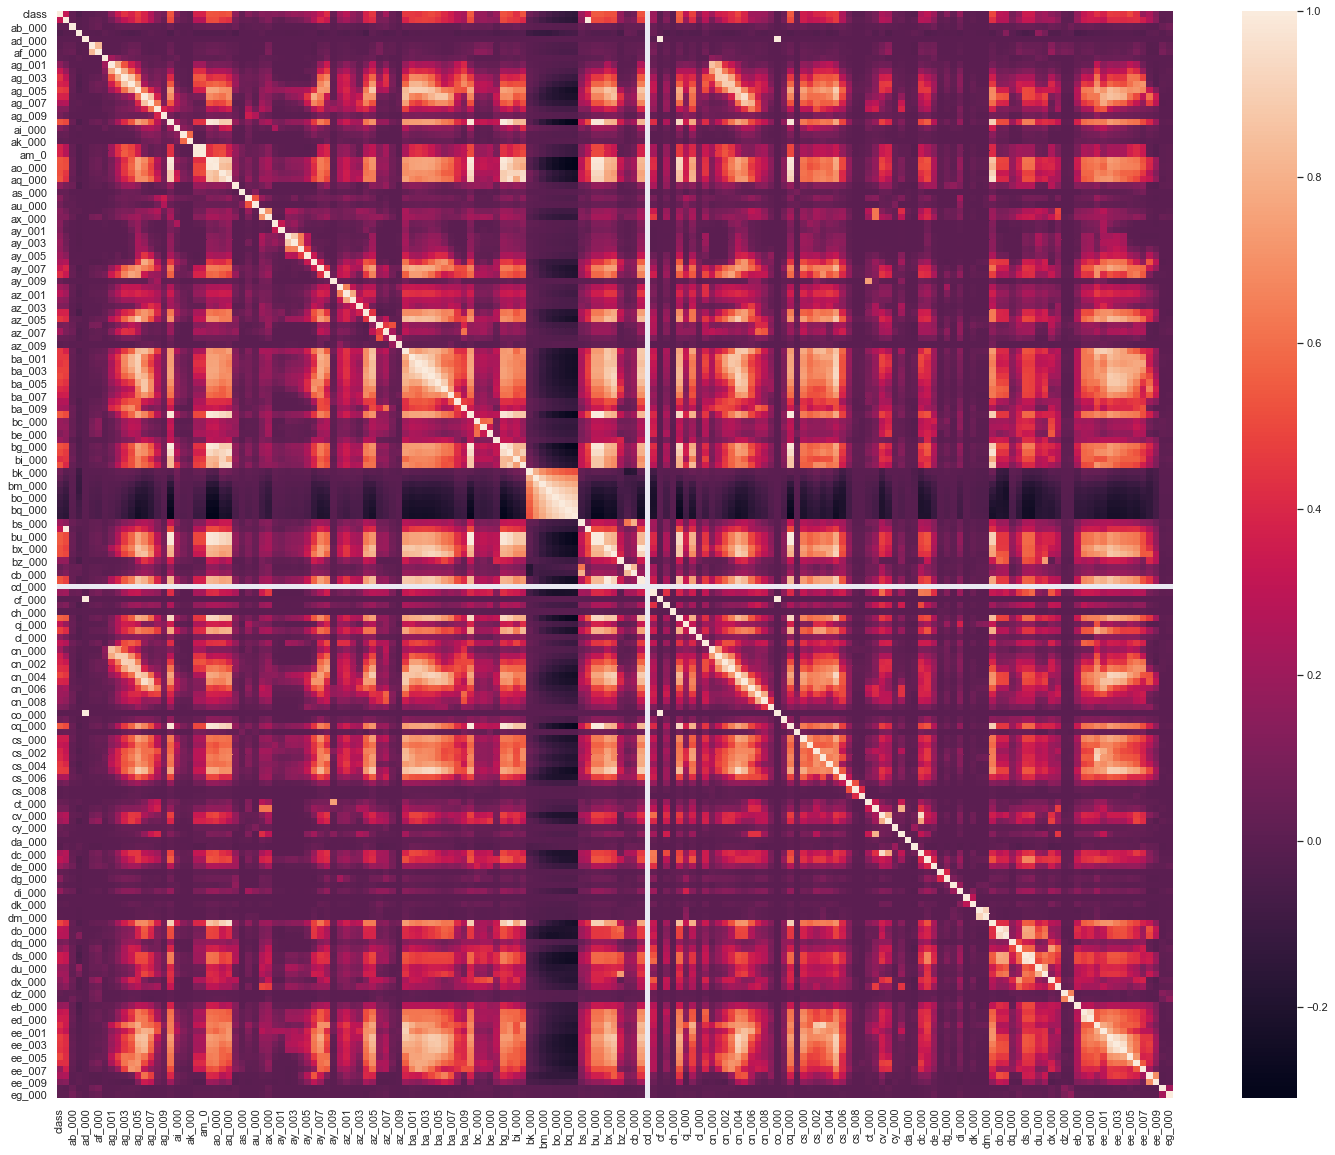

In [72]:
fig = plt.figure(figsize=(25,20))
sns.heatmap(dataset.corr())

**iv. Pick sqrt(170) features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.**

In [73]:
top_13 = dict(sorted(cv_dict.items(), key=lambda x: x[1], reverse=True)[:int(math.sqrt(170))])
top_13

{'cf_000': 207.2702736886315,
 'co_000': 206.87612939952814,
 'ad_000': 206.72149958176453,
 'cs_009': 192.52261084543085,
 'dj_000': 122.12815277529702,
 'as_000': 113.88275538316807,
 'dh_000': 112.65245027418743,
 'df_000': 111.36966565765684,
 'ag_000': 91.46065359583645,
 'au_000': 86.0856375114368,
 'ak_000': 78.62298773590766,
 'az_009': 77.99955638588112,
 'ay_009': 77.46110130112072}

In [74]:
keys_for_pairplot = list(top_13.keys())
keys_for_pairplot.append("class")

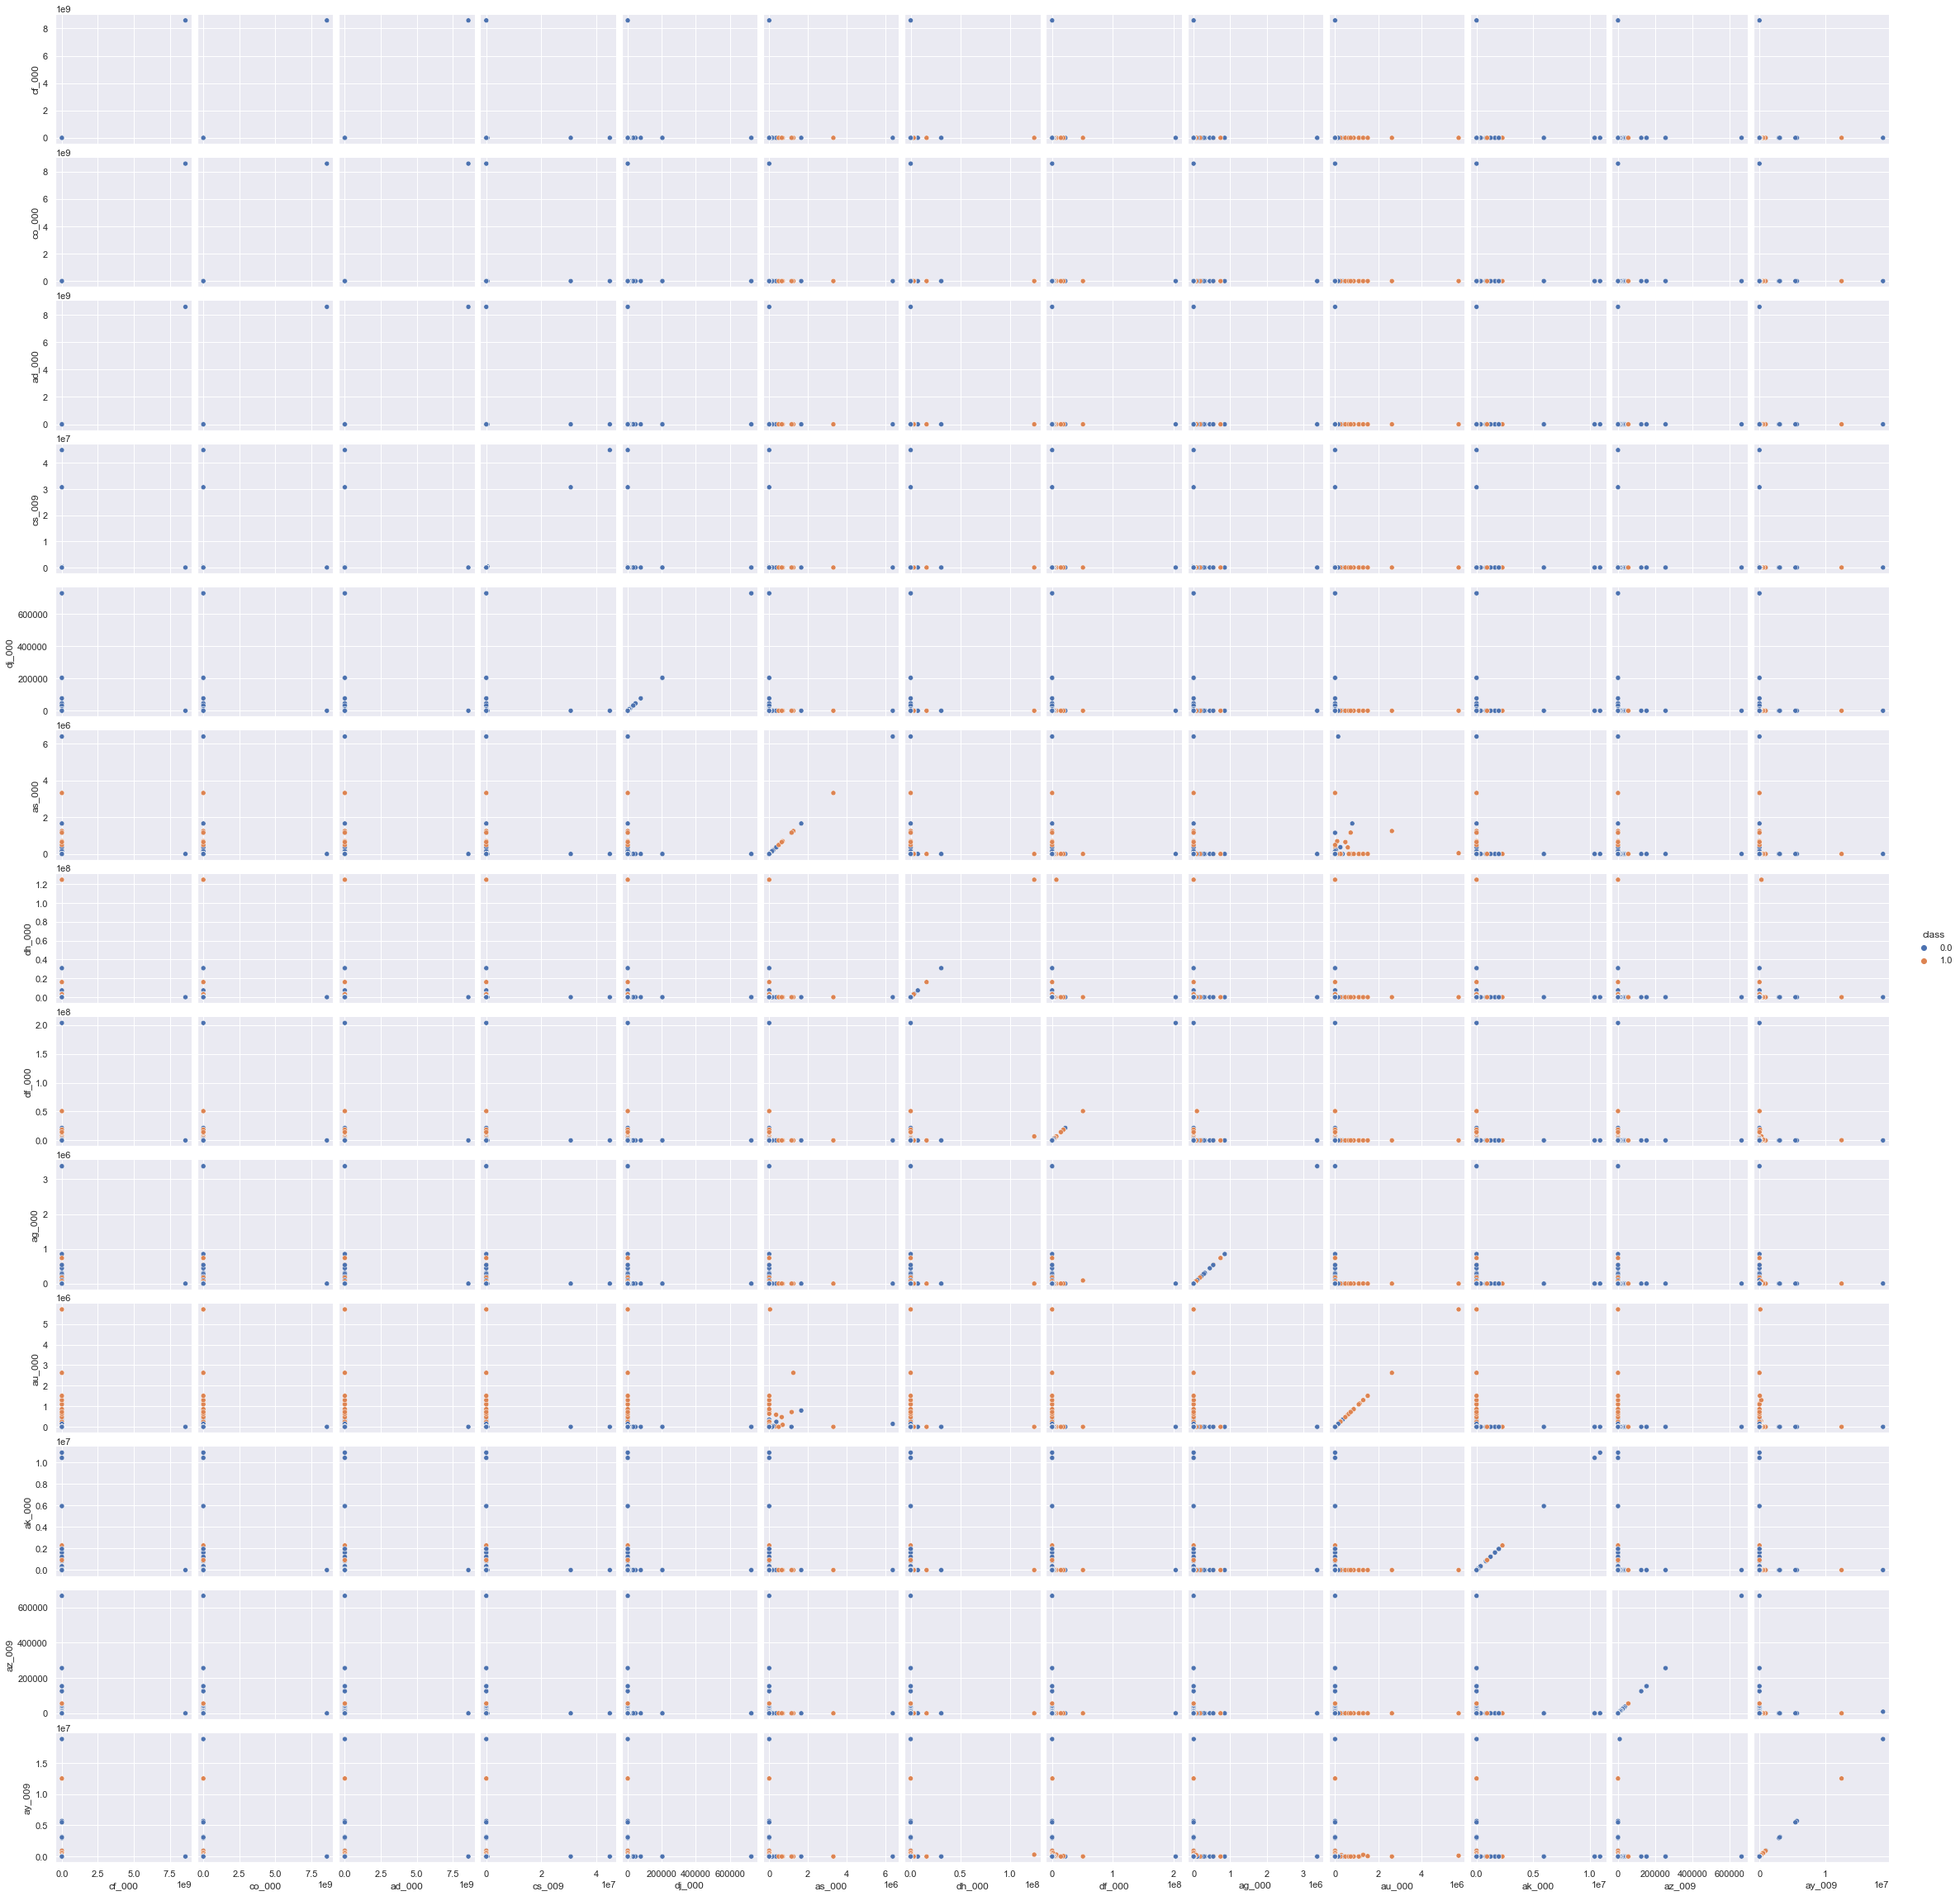

In [75]:
sns.pairplot(dataset[keys_for_pairplot], diag_kind = None, hue = "class")

<AxesSubplot:>

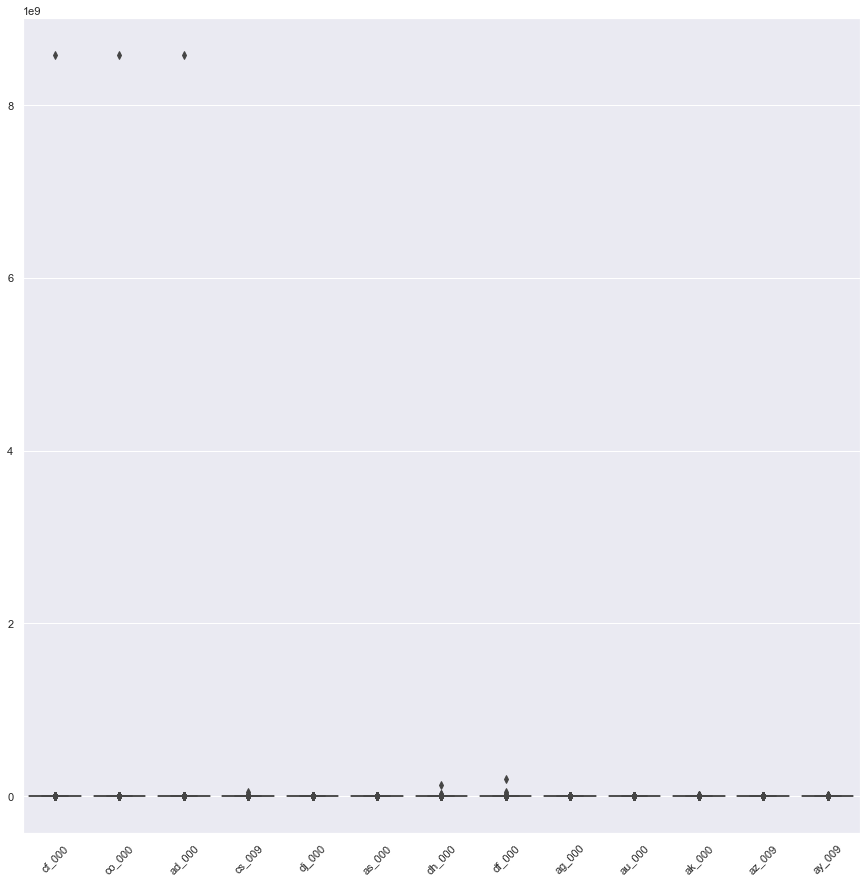

In [76]:
sns.set(rc={'figure.figsize':(15, 15)})
plt.xticks(rotation=45)
sns.boxplot(data = dataset[top_13.keys()])

From the scatter plots alone, we can see that there are many zero values, and some of the features have linear relationships with each other. However, we cannot say for sure that they are significant, other than the fact that their CVs are high.

**v. Determine the number of positive and negative data. Is this data set imbalanced?**

In [77]:
dataset["class"].value_counts()

0.0    74625
1.0     1375
Name: class, dtype: int64

The dataset is imbalanced because the positive class makes up only ~ 1.8% of the total class.

**(c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.**

In [78]:
rfc = RandomForestClassifier(max_depth=2, random_state=0, warm_start=True,
            oob_score=True)

In [79]:
X_train = train.drop(columns = ["class"])
y_train = train["class"]
X_test = test.drop(columns = ["class"])
y_test = test["class"]

In [80]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, oob_score=True, random_state=0,
                       warm_start=True)

In [81]:
y_pred = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [82]:
# Confusion matrix.

print("Training confusion matrix:\n", confusion_matrix(y_train, y_pred_train))
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
print("")
print("Test confusion matrix:\n", confusion_matrix(y_test, y_pred))
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred).ravel()

Training confusion matrix:
 [[58978    22]
 [  812   188]]

Test confusion matrix:
 [[15624     1]
 [  304    71]]


In [83]:
# ROC AUC score.

print("Training AUC Score:\n", roc_auc_score(y_train, y_pred_train))
print("")
print("Test AUC Score:\n", roc_auc_score(y_test, y_pred))

Training AUC Score:
 0.5938135593220338

Test AUC Score:
 0.5946346666666668


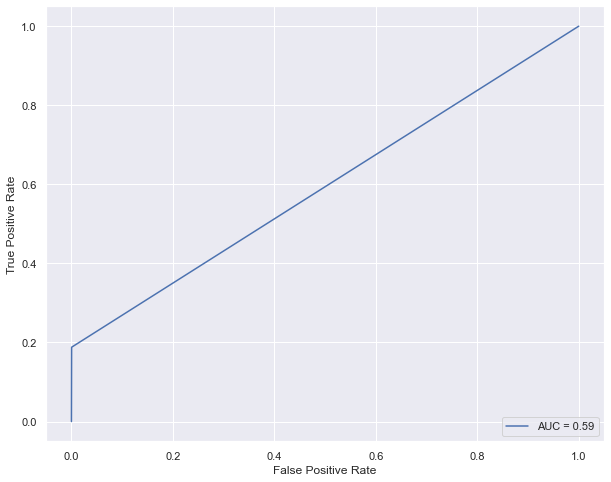

In [84]:
# ROC curve for training.

sns.set(rc={'figure.figsize':(10, 8)})
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()

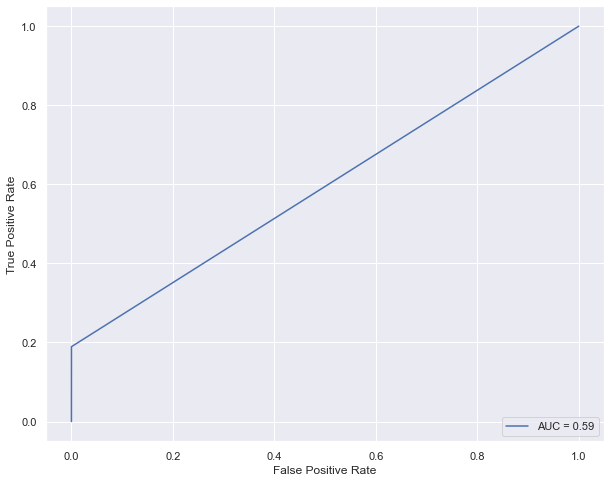

In [85]:
# ROC curve for test.

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr =tpr, roc_auc = roc_auc)
display.plot()

In [86]:
# Misclassification.

print("Misclassification for training\n", (fp_train + fn_train))
print("")
print("Misclassification for test:\n", (fp_test + fn_test))

Misclassification for training
 834

Misclassification for test:
 305


In [87]:
# Errors.

print("Training error:\n", 1 - accuracy_score(y_train, y_pred_train))
print("")
print("Test error:\n", 1 - accuracy_score(y_test, y_pred))

Training error:
 0.013900000000000023

Test error:
 0.019062499999999982


In [88]:
print("Out of bag error:", 1 - rfc.oob_score_)

Out of bag error: 0.014100000000000001


The out of bag error is 0.0141 which is smaller than that of the test set (0.019).

**(d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 1c. Compare the results withthose of 1c.**

We can assign weights to the classes of a random forest classifier, or perform resampling. In this question I will use class_weight = "balanced" to compensate for the minority class.

In [89]:
rfc_balanced = RandomForestClassifier(n_estimators = 50, class_weight='balanced', max_depth=2, random_state=0, oob_score=True)

In [90]:
rfc_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=50,
                       oob_score=True, random_state=0)

In [91]:
y_pred = rfc_balanced.predict(X_test)
y_pred_train = rfc_balanced.predict(X_train)

In [92]:
# Confusion matrix.

print("Training confusion matrix:\n", confusion_matrix(y_train, y_pred_train))
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
print("")
print("Test confusion matrix:\n", confusion_matrix(y_test, y_pred))
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred).ravel()

Training confusion matrix:
 [[55121  3879]
 [   55   945]]

Test confusion matrix:
 [[14645   980]
 [   14   361]]


In [93]:
# AUC score.

print("Training AUC Score:\n", roc_auc_score(y_train, y_pred_train))
print("")
print("Test AUC Score:\n", roc_auc_score(y_test, y_pred))

Training AUC Score:
 0.9396271186440678

Test AUC Score:
 0.9499733333333334


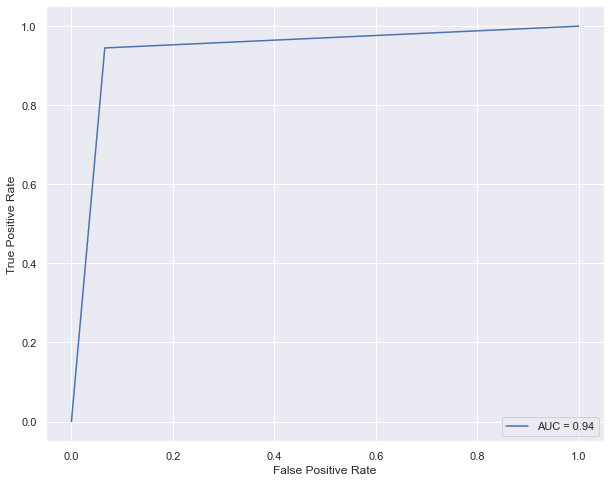

In [94]:
# ROC curve for training.

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()

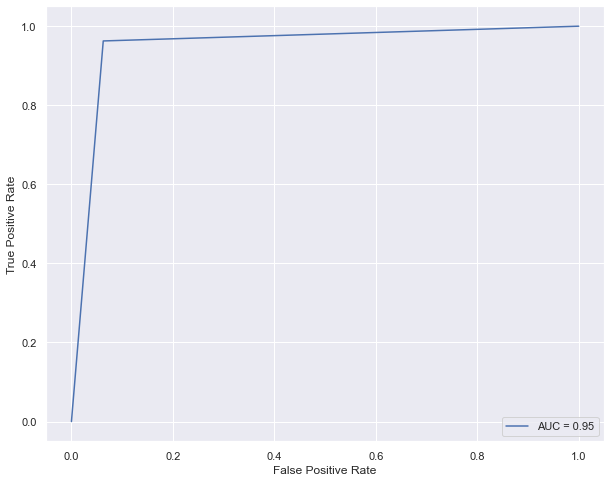

In [95]:
# ROC curve for test.

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr =tpr, roc_auc = roc_auc)
display.plot()

In [96]:
# Misclassification.

print("Misclassification for training\n", (fp_train + fn_train))
print("")
print("Misclassification for test:\n", (fp_test + fn_test))

Misclassification for training
 3934

Misclassification for test:
 994


In [97]:
# Errors.

print("Training error:\n", 1 - accuracy_score(y_train, y_pred_train))
print("")
print("Test error:\n", 1 - accuracy_score(y_test, y_pred))

Training error:
 0.06556666666666666

Test error:
 0.062124999999999986


In [98]:
print("Out of bag error:", 1 - rfc_balanced.oob_score_)

Out of bag error: 0.06563333333333332


The out of bag error is 0.065 which is quite similar to that of the test set.

**Comparison**

The training and test errors of both models are quite similar (0.013/0.019 and 0.065,0.062). However, the AUC scores are significantly different: (0.593/0.594 and 0.939/0.949), and the ROC curves of the later model show much better results. The out-of-bag errors of both models are roughly equal to their respective errors.

| RFC Training Error | RFC Test Error | RFC Balanced Training Error | RFC Balanced Test Error |
| --- | --- | --- | --- |
| 0.013900000000000023 | 0.019062499999999982 | 0.06556666666666666 | 0.062124999999999986 |

| RFC Training AUC | RFC Test AUC | RFC Balanced Training AUC | RFC Balanced Test AUC |
| --- | --- | --- | --- |
| 0.5938135593220338 | 0.5946346666666668 | 0.9396271186440678 |  0.9499733333333334 |

**(e) XGBoost and Model Trees**

In [99]:
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}
xgb = XGBClassifier(use_label_encoder = False, eval_metric = "error")
grid = GridSearchCV(xgb, parameters, verbose = 1, cv = 5) 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='error', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=False,
                                     validate_parameters=None, verbosity=None),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100,
                                   1000]},
             verbose=1)

In [100]:
print("Best alpha:", grid.best_params_['alpha'])

Best alpha: 0.0001


In [101]:
xgb = XGBClassifier(use_label_encoder = False, eval_metric = "error", alpha = grid.best_params_['alpha'])
xgb.fit(X_train, y_train)

XGBClassifier(alpha=0.0001, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, eval_metric='error', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=9.99999975e-05, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, ...)

In [102]:
y_pred = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)

In [103]:
# Confusion matrix.

print("Training confusion matrix:\n", confusion_matrix(y_train, y_pred_train))
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
print("")
print("Test confusion matrix:\n", confusion_matrix(y_test, y_pred))
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred).ravel()

Training confusion matrix:
 [[59000     0]
 [    1   999]]

Test confusion matrix:
 [[15609    16]
 [   78   297]]


In [104]:
# ROC AUC score.

print("Training AUC Score:\n", roc_auc_score(y_train, y_pred_train))
print("")
print("Test AUC Score:\n", roc_auc_score(y_test, y_pred))

Training AUC Score:
 0.9995

Test AUC Score:
 0.895488


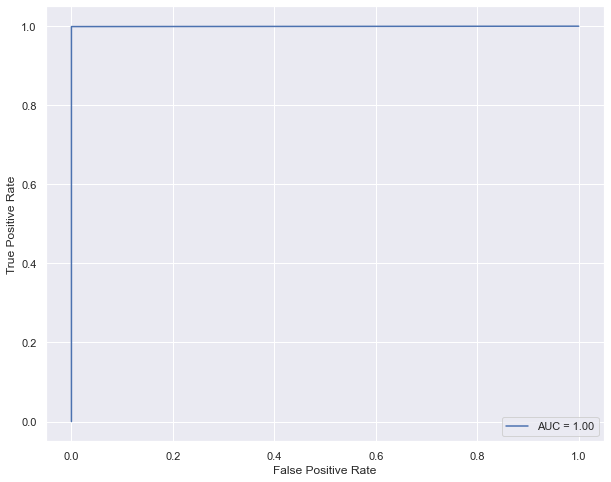

In [105]:
# ROC curve for training.

fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()

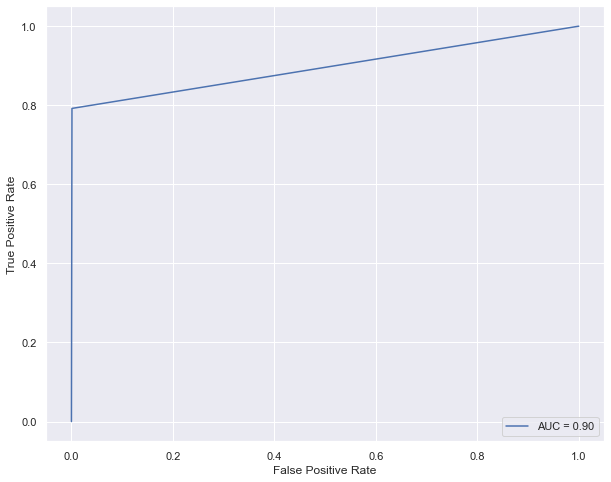

In [106]:
# ROC curve for test.

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()

In [107]:
# Misclassification.

print("Misclassification for training\n", (fp_train + fn_train))
print("")
print("Misclassification for test:\n", (fp_test + fn_test))

Misclassification for training
 1

Misclassification for test:
 94


In [108]:
# Errors.

print("Training error:\n", 1 - accuracy_score(y_train, y_pred_train))
print("")
print("Test error:\n", 1 - accuracy_score(y_test, y_pred))

Training error:
 1.666666666666483e-05

Test error:
 0.005874999999999964


**(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.**

In [109]:
pipeline = imbpipeline(steps = [['smote', SMOTE()], ['classifier',  XGBClassifier(use_label_encoder=False, eval_metric = "error")]])

In [110]:
parameters = {"classifier__alpha": [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}
grid = GridSearchCV(pipeline, parameters, refit = True, verbose = 1, cv = 5)
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[['smote', SMOTE()],
                                       ['classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      eval_metric='error',
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_dep...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None,
                                                      reg_alpha=None,
                                                      reg_lambda=None,
                                                      scale_pos_weight=None,
                                                      subsample=None,
                                                      tree_method=None,
                                                      use_label_encoder=False,
                                                      validate_parameters=None,
                                                      verbosity=None)]]),
             param_grid={'classifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0,
                                               10, 100, 1000]},
             verbose=1)

In [111]:
print("Best alpha:", grid.best_params_['classifier__alpha'])

Best alpha: 0.1


In [112]:
oversample = SMOTE()
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

In [113]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric = "error", alpha = grid.best_params_['classifier__alpha'])
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(alpha=0.1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.100000001, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [114]:
y_pred = xgb.predict(X_test)
y_pred_train = grid.predict(X_train_resampled)

In [115]:
# Confusion matrix.

print("Training confusion matrix:\n", confusion_matrix(y_train_resampled, y_pred_train))
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train_resampled, y_pred_train).ravel()
print("")
print("Test confusion matrix:\n", confusion_matrix(y_test, y_pred))
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred).ravel()

Training confusion matrix:
 [[59000     0]
 [    2 58998]]

Test confusion matrix:
 [[15427   198]
 [   50   325]]


In [116]:
# AUC score.

print("Training AUC Score:\n", roc_auc_score(y_train_resampled, y_pred_train))
print("")
print("Test AUC Score:\n", roc_auc_score(y_test, y_pred))

Training AUC Score:
 0.9999830508474576

Test AUC Score:
 0.9269973333333333


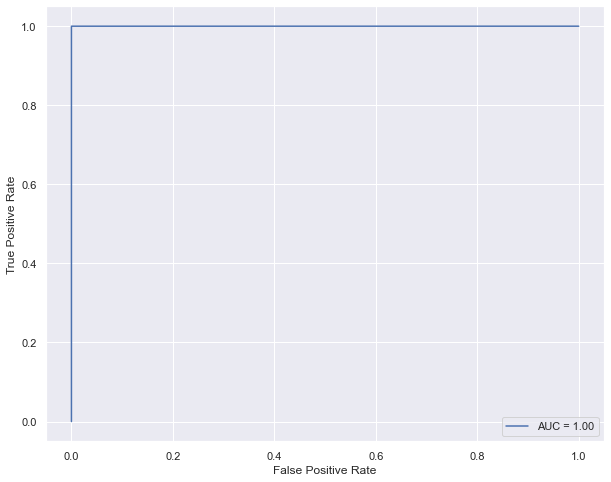

In [117]:
# ROC curve for training.

fpr, tpr, thresholds = metrics.roc_curve(y_train_resampled, y_pred_train)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc)
display.plot()

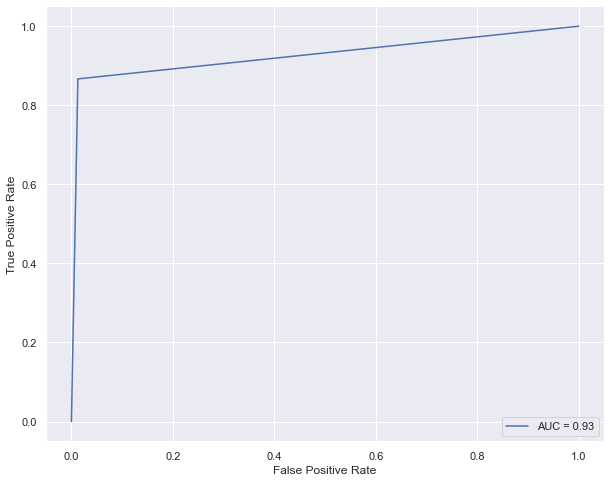

In [118]:
# ROC curve for test.

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [119]:
# Misclassification.

print("Misclassification for training\n", (fp_train + fn_train))
print("")
print("Misclassification for test:\n", (fp_test + fn_test))

Misclassification for training
 2

Misclassification for test:
 248


In [120]:
# Errors.

print("Training error:\n", 1 - accuracy_score(y_train_resampled, y_pred_train))
print("")
print("Test error:\n", 1 - accuracy_score(y_test, y_pred))

Training error:
 1.694915254235596e-05

Test error:
 0.015499999999999958


**Comparison**

The errors of the uncompensated case are slightly smaller. The SMOTE model also misclassified more items. The training AUC scores for both models are quite similar (*0.99*), but the test AUC for the SMOTE case is slightly higher (*0.92* compared to *0.89* of the uncompensated case). 

| Uncompensated Training Error | Uncompensated Test Error | SMOTE Training Error | SMOTE Test Error |
| --- | --- | --- | --- |
| 1.666666666666483e-05 | 0.005874999999999964 | 1.694915254235596e-05 | 0.015499999999999958 |

| Uncompensated Training AUC | Uncompensated Test AUC | SMOTE Training AUC | SMOTE Test AUC |
| --- | --- | --- | --- |
| 0.9995 | 0.895488 | 0.9999830508474576 |  0.9269973333333333 |

**2. 6.6.3**

* a. As we increase s from 0, the model will become more and more flexible, therefore the training RSS will *steadily decrease*.
* b. As we increase s from 0, the model will become more and more flexible. At first, the test RSS will decrease, but after a while, it will increase because the more flexible the model is, the more likely it will overfit to the training data. So the answer is *Decrease initially, and then eventually start increasing in a U shape*.
* c. As s increases, the flexibility increases, therefore, the variance also *steadily increases*.
* d. As s increases, variance increases therefore squared bias *steadily decreases*.
* e. The irreducible error will *remain constant* no matter what s becomes.

**3. 6.6.5**

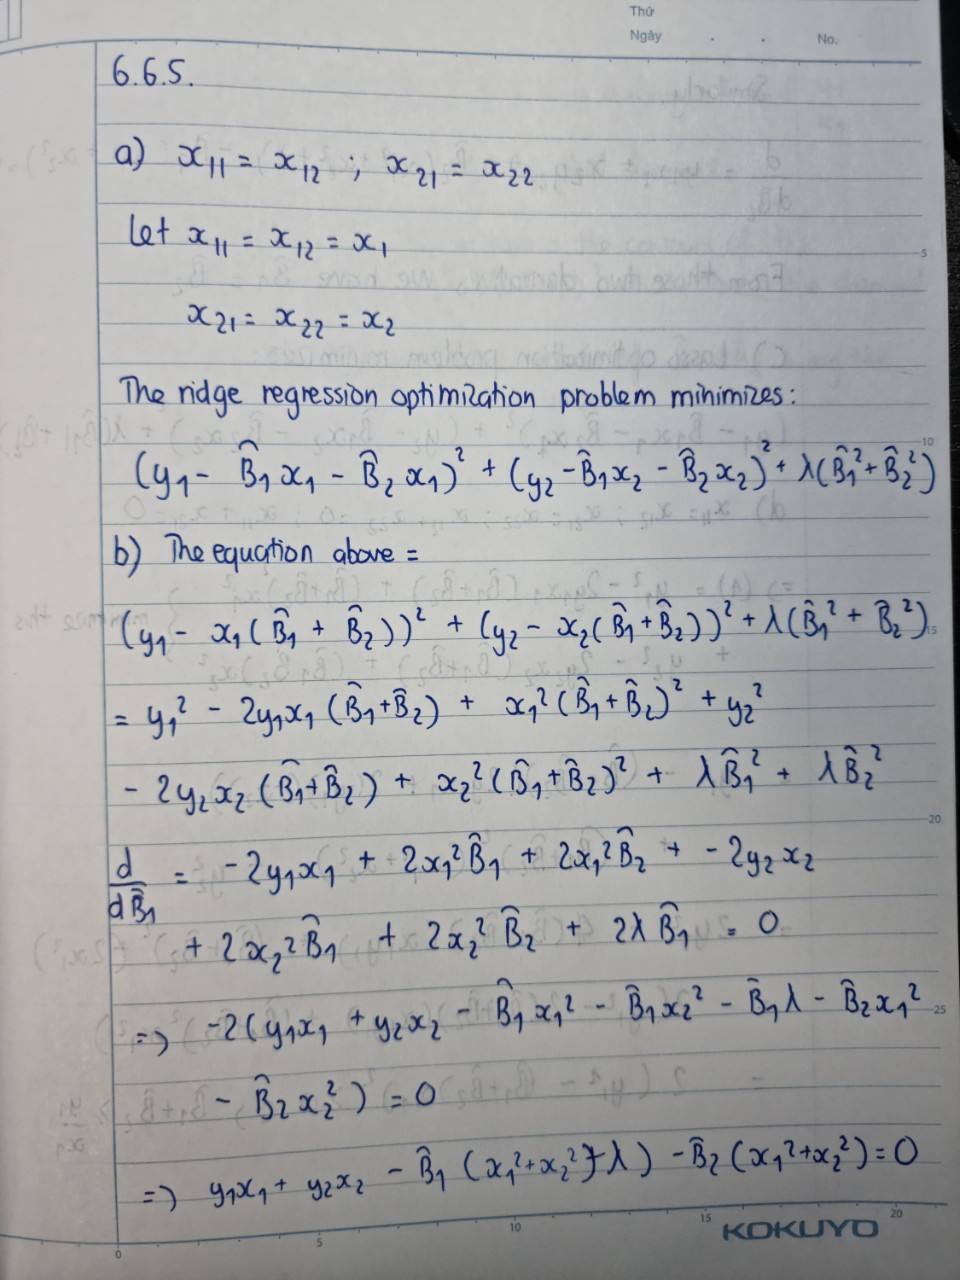

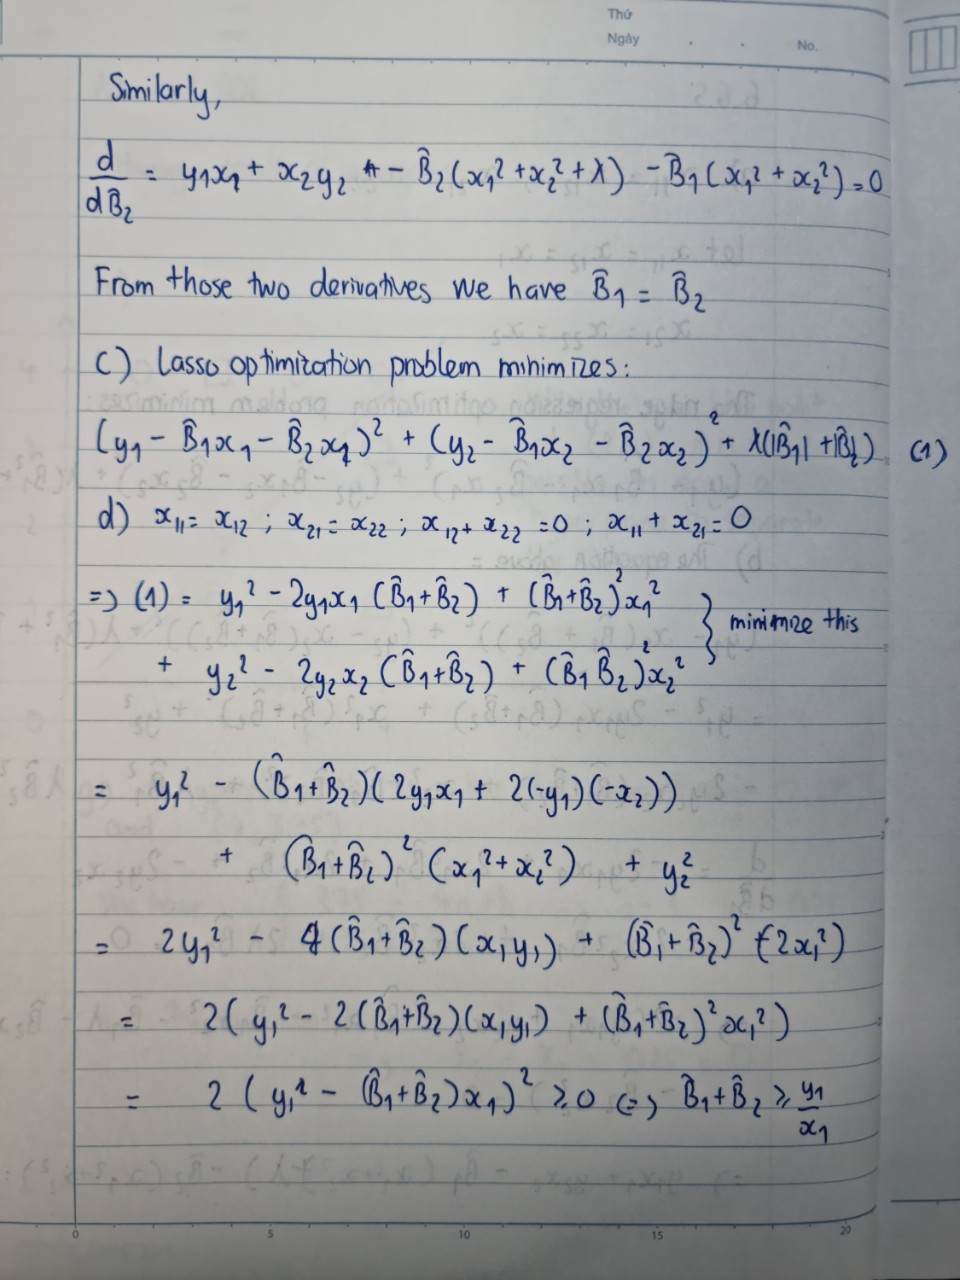

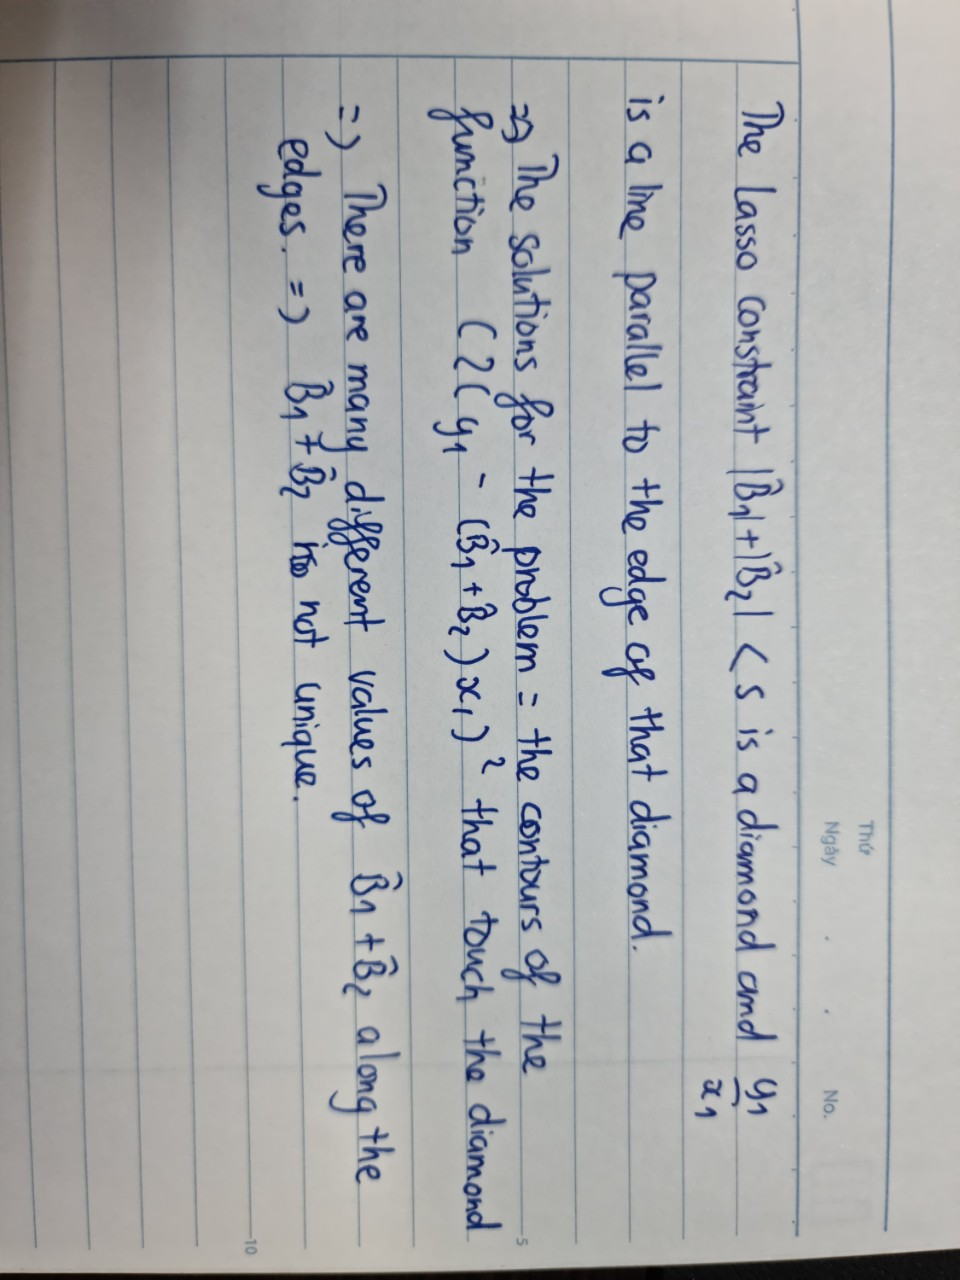

**4. 8.4.5**

0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.

From the probabilities, we have *4 Greens* (0.1, 0.15, 0.2, 0.2) and *6 Reds* (0.55, 0.6, 0.6, 0.7, 0.75).

* The first method will classify X as *Red* because Red was the majority color.

* In the second method, the average probability is (0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75) / 10 = 0.45, therefore X will be classified as *Green*.

**5. 9.7.3**

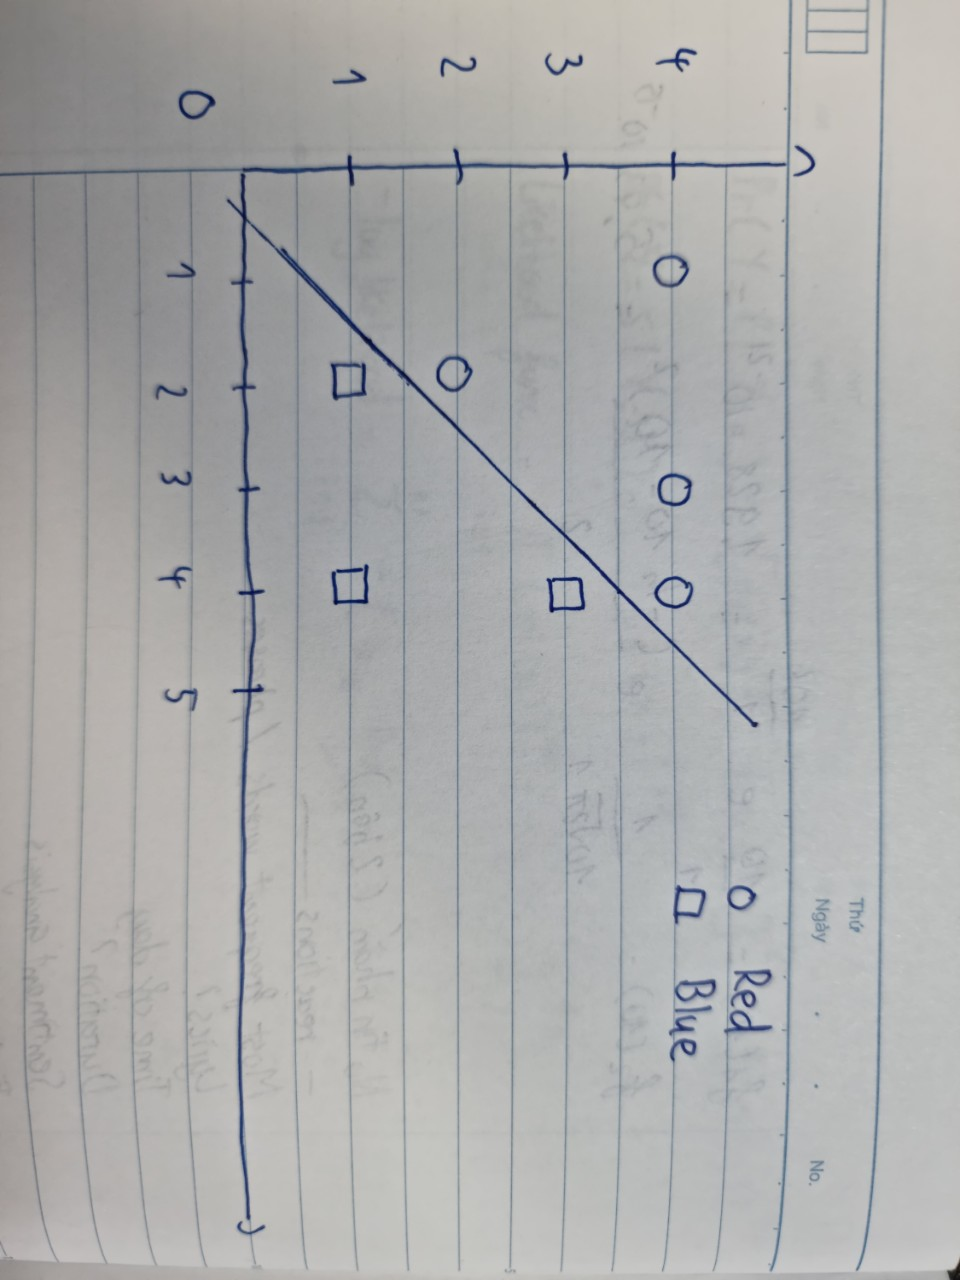

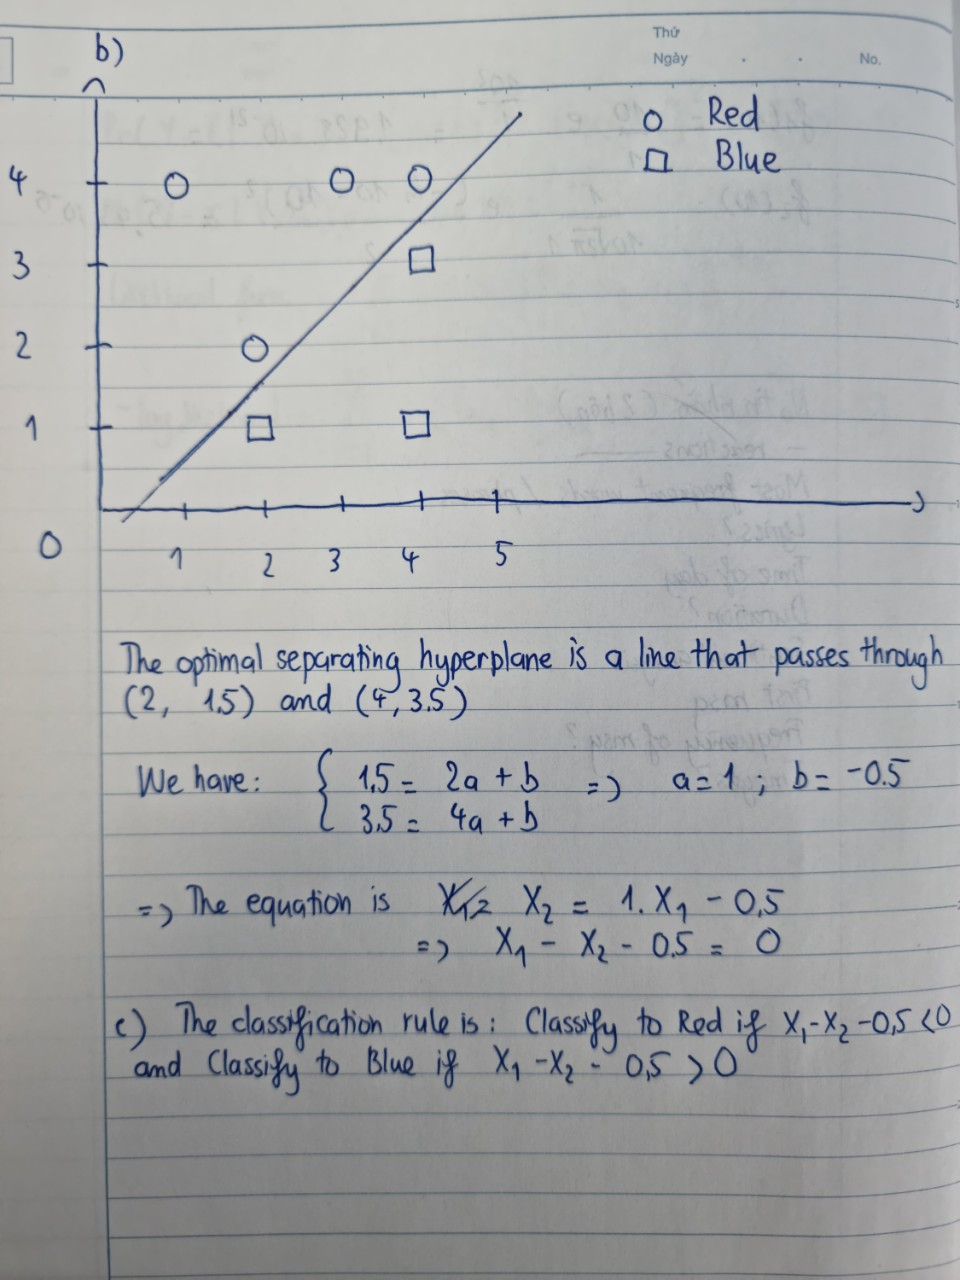

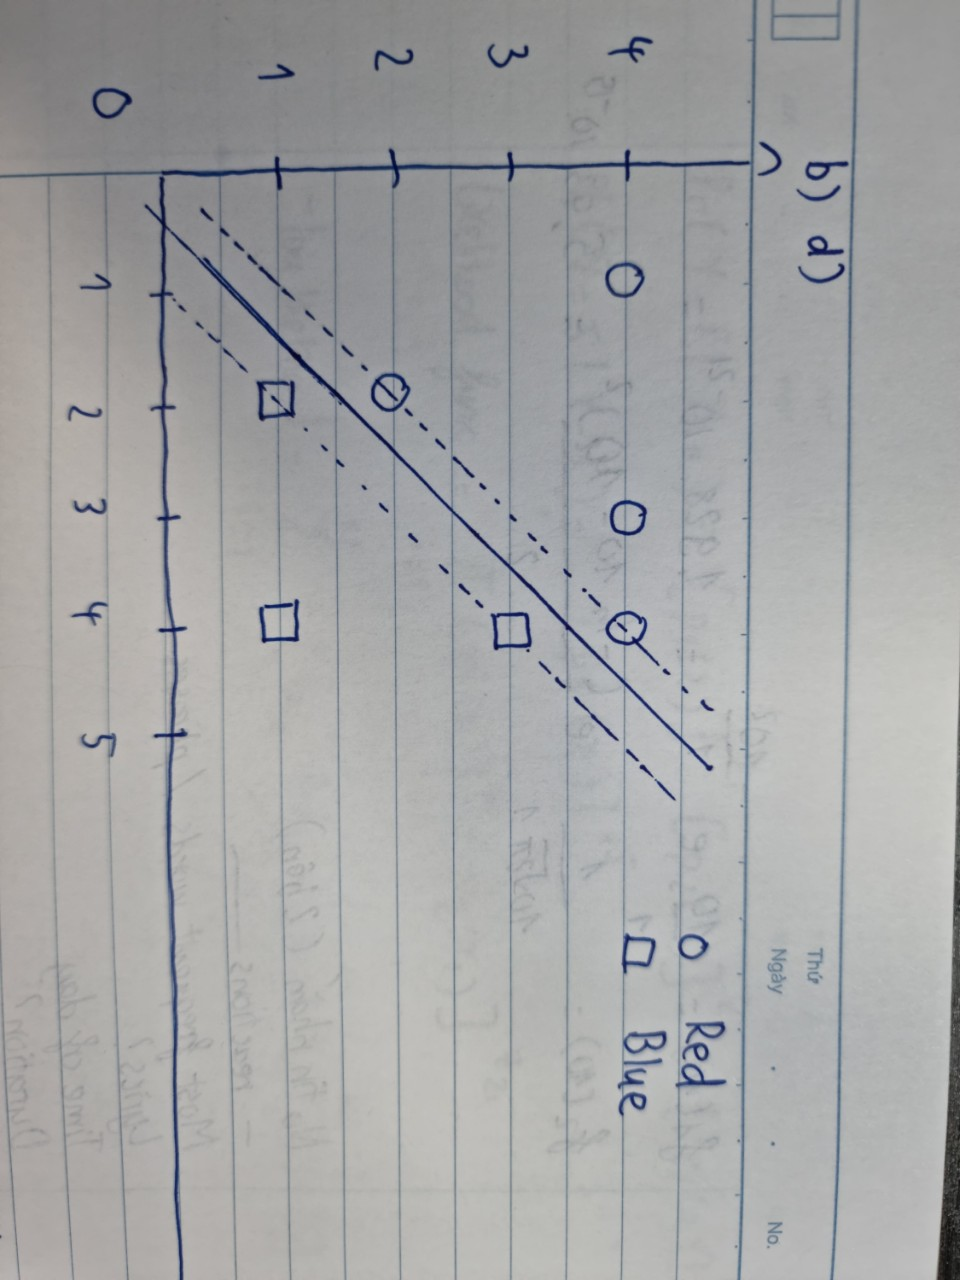

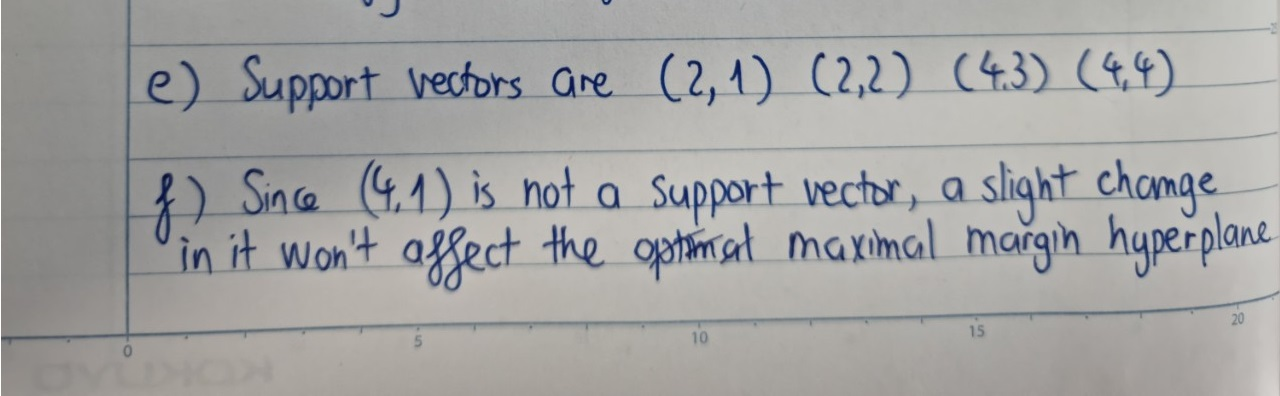

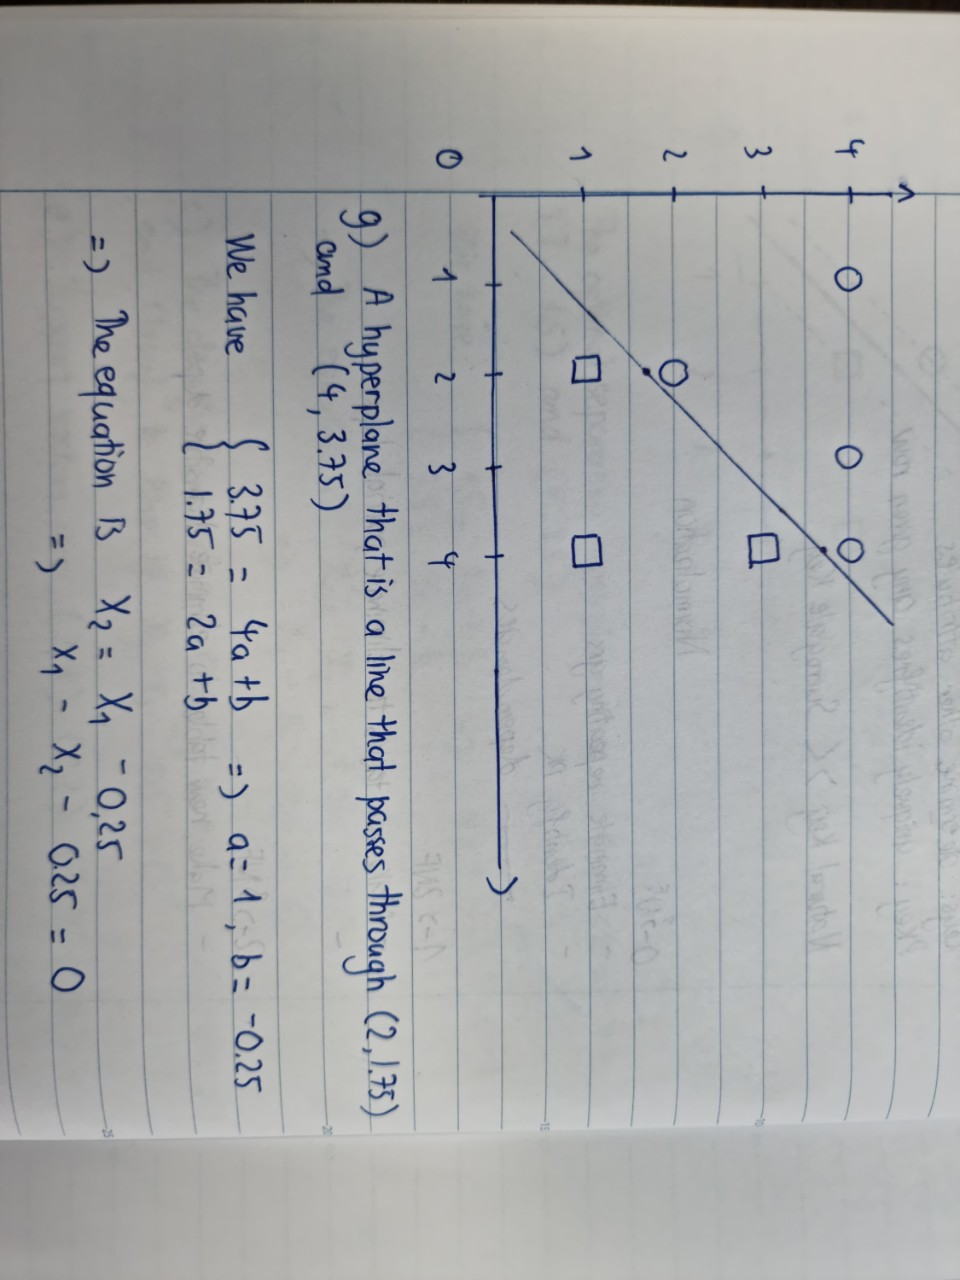

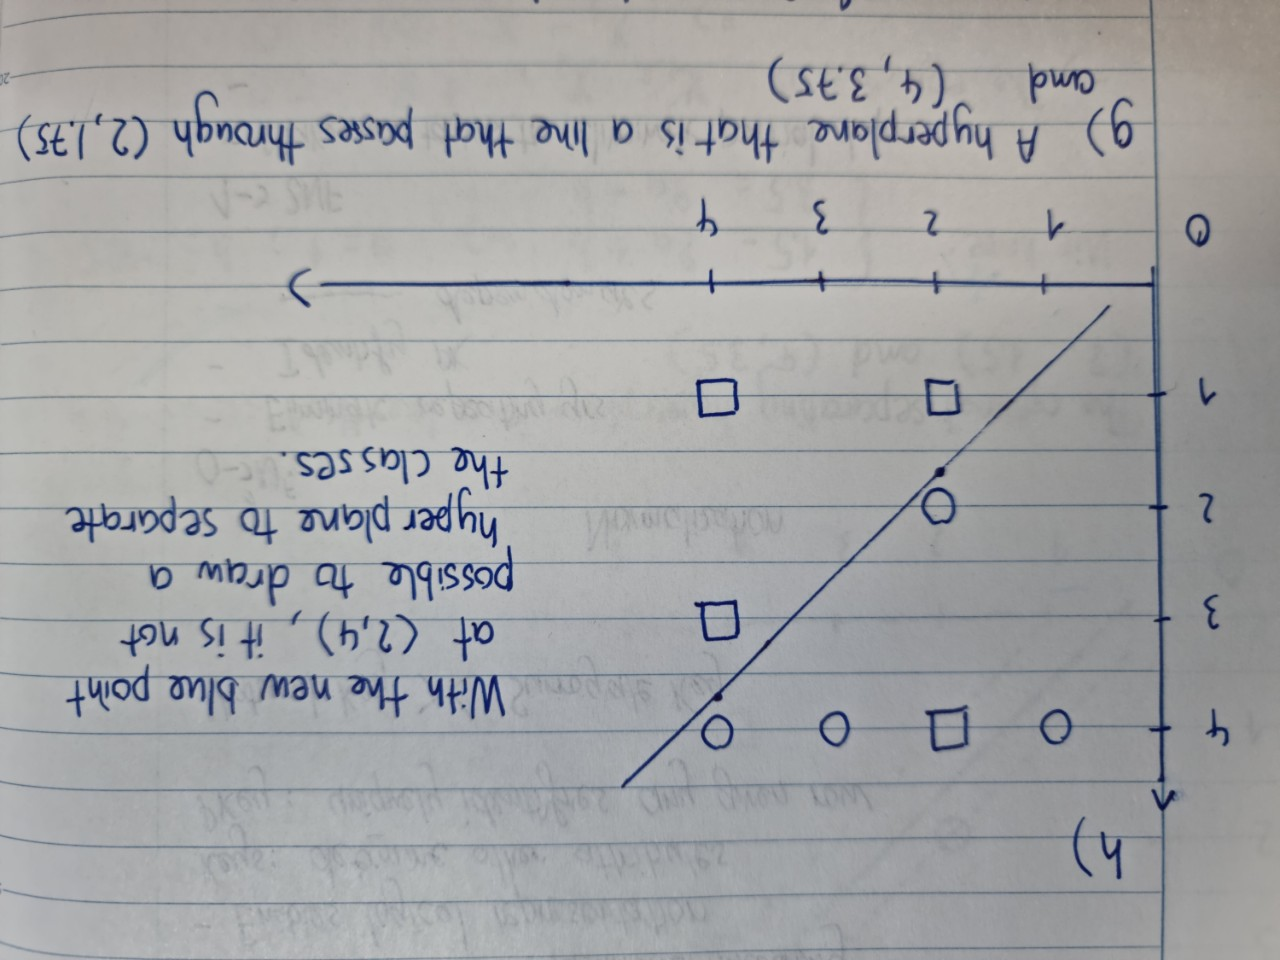